In [106]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [107]:
import networkx as nx

# Network X

## Create and Visualize simple unidirectional graph:

In [108]:
G = nx.Graph() # for a directed graph use nx.DiGraph()

# add nodes
G.add_node(1)
G.add_nodes_from(range(2,9))  # add multiple nodes at once

# add edges 
G.add_edge(1,2)
edges = [(2,3), (1,3), (4,1), (4,5), (5,6), (5,7), (6,7), (7,8), (6,8)]
G.add_edges_from(edges)

#Print infos
print(G.nodes())
print(len(G.nodes()))
print(len(G.edges()))
print(nx.info(G))

[1, 2, 3, 4, 5, 6, 7, 8]
8
10
Graph with 8 nodes and 10 edges


## Useful functions:

### Plot Degree Distribution:

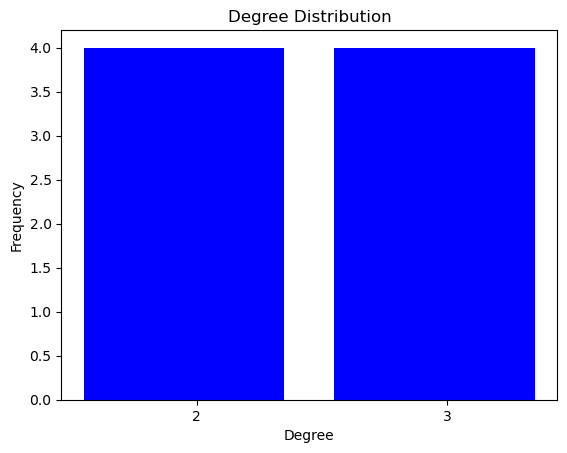

In [109]:
def plot_degree_distribution(G):
    degrees = {}
    for node in G.nodes():
        degree = G.degree(node)
        if degree not in degrees:
            degrees[degree] = 0
        degrees[degree] += 1
    sorted_degree = sorted(degrees.items())
    deg = [k for (k,v) in sorted_degree]
    cnt = [v for (k,v) in sorted_degree]
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Distribution")
    plt.ylabel("Frequency")
    plt.xlabel("Degree")
    ax.set_xticks([d+0.05 for d in deg])
    ax.set_xticklabels(deg)

plot_degree_distribution(G)

### Describe the Network:

In [110]:
# Helper function for printing various graph properties
def describe_graph(G):
    print(nx.info(G))
    if nx.is_connected(G):
    #if nx.is_weakly_connected(G):  #for directed
        print("Avg. Shortest Path Length: %.4f" %nx.average_shortest_path_length(G))
        print("Diameter: %.4f" %nx.diameter(G)) # Longest shortest path
    else:
        print("Graph is not connected")
        print("Diameter and Avg shortest path length are not defined!")
    print("Sparsity: %.4f" %nx.density(G))  # #edges/#edges-complete-graph
    # #closed-triplets(3*#triangles)/#all-triplets
    print("Global clustering coefficient aka Transitivity: %.4f" %nx.transitivity(G))

describe_graph(G)

Graph with 8 nodes and 10 edges
Avg. Shortest Path Length: 2.3929
Diameter: 5.0000
Sparsity: 0.3571
Global clustering coefficient aka Transitivity: 0.5625


### Visualize the Graph:

#### Code from class:

"Other usages:\nvisualize_graph(G, False, k=0.05, alpha=0.4)                    No annotations + no lines\nvisualize_graph(G, False, k=0.2, alpha=0.4, node_shape='.')     With line and smaller nodes.\n"

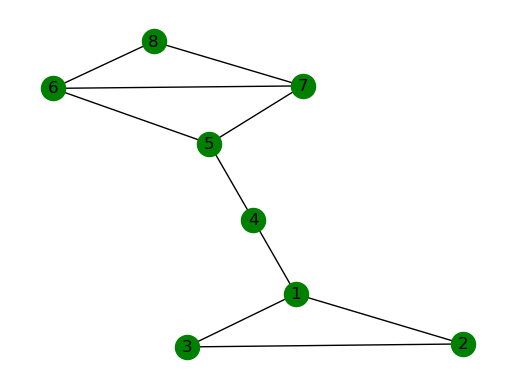

In [111]:
# Helper function for visualizing the graph
def visualize_graph(G, with_labels=True, k=None, alpha=1.0, node_shape='o'):
    #nx.draw_spring(G, with_labels=with_labels, alpha = alpha)
    pos = nx.spring_layout(G, k=k)
    if with_labels:
        lab = nx.draw_networkx_labels(G, pos, labels=dict([(n, n) for n in G.nodes()]))
    ec = nx.draw_networkx_edges(G, pos, alpha=alpha)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='g', node_shape=node_shape)
    plt.axis('off')

visualize_graph(G)
'''Other usages:
visualize_graph(G, False, k=0.05, alpha=0.4)                    No annotations + no lines
visualize_graph(G, False, k=0.2, alpha=0.4, node_shape='.')     With line and smaller nodes.
'''

#### draw spring:

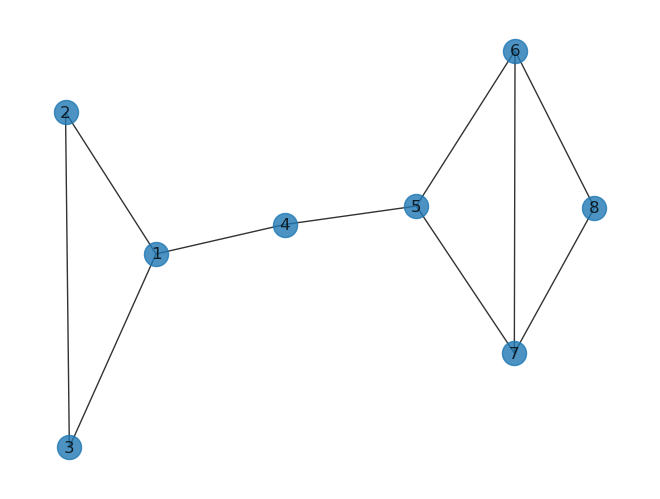

In [112]:
nx.draw_spring(G, with_labels=True,  alpha = 0.8)

#### draw circular:

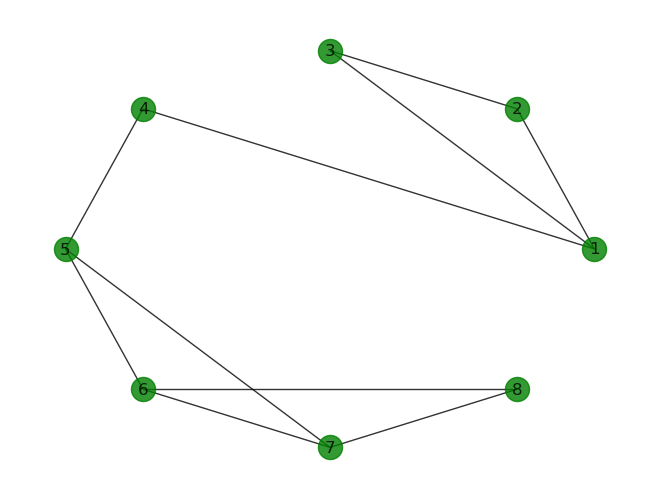

In [113]:
nx.draw_circular(G, with_labels=True,  node_color='g', alpha = 0.8)

### Draw Sub-Graphs:

In [114]:
subgraph_1 = G.subgraph([1]+list(G.neighbors(1)))
subgraph_3 = G.subgraph([3]+list(G.neighbors(3)))

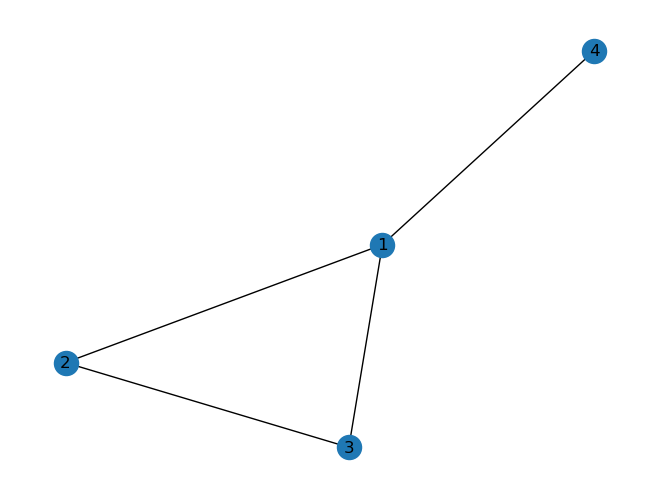

In [115]:
nx.draw_spring(subgraph_1, with_labels=True)

## Plot different kinds of graphs:

### Erdos-Renyi graph:

Graph with 10 nodes and 20 edges
Graph is not connected
Diameter and Avg shortest path length are not defined!
Sparsity: 0.4444
Global clustering coefficient aka Transitivity: 0.5342


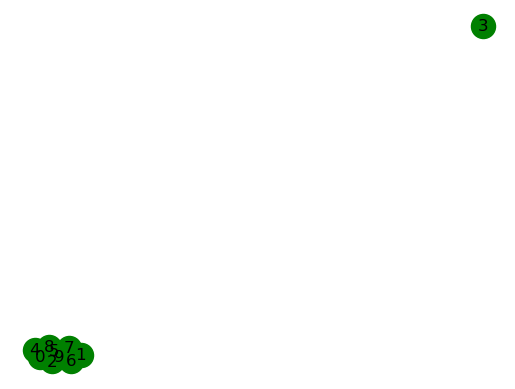

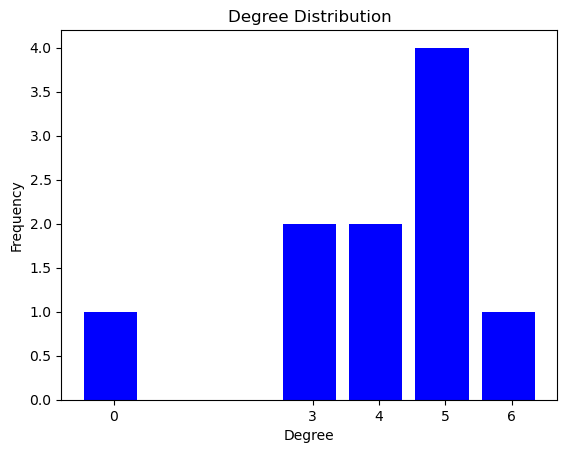

In [116]:
n = 10  # 10 nodes
m = 20  # 20 edges

erG = nx.gnm_random_graph(n, m)

describe_graph(erG)
visualize_graph(erG, k=0.05, alpha=0.8)
plot_degree_distribution(erG)

### Zachary Karate Club Network:

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
Avg. Shortest Path Length: 2.4082
Diameter: 5.0000
Sparsity: 0.1390
Global clustering coefficient aka Transitivity: 0.2557


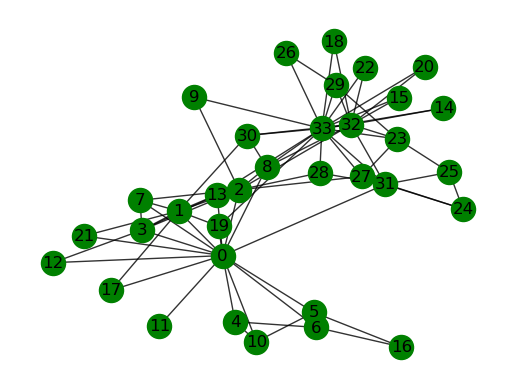

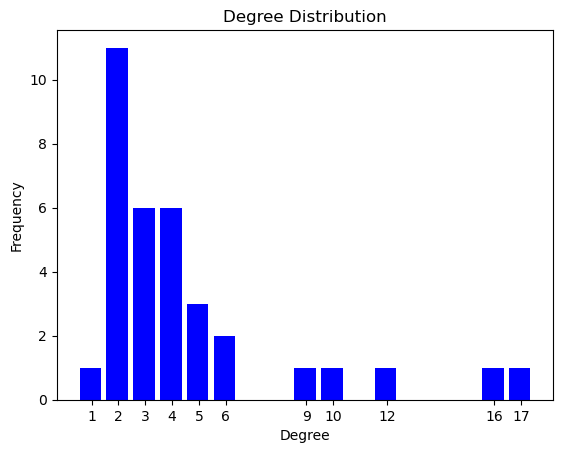

In [117]:
karateG = nx.karate_club_graph()
describe_graph(karateG)
visualize_graph(karateG, k=0.05, alpha=0.8)
plot_degree_distribution(karateG)

## Create your own networks from dataframes:

### Read a tsv file:

In [118]:
%%skip
df = pd.read_csv('path/to/file.tsv', sep='\t')
df = pd.read_table('path/to/file.tsv')


UsageError: Cell magic `%%skip` not found.


### Create Network:

In [119]:
%%skip
exampleG =nx.from_pandas_edgelist(df_edges, 'Source', 'Target', edge_attr=None, create_using= nx.Graph())
#for directed:
#exampleG =nx.from_pandas_edgelist(df_edges, 'Source', 'Target', edge_attr=None, create_using= nx.DiGraph())
describe_graph(exampleG)

# Where df contains a columns "Source" and another one "Target".

UsageError: Cell magic `%%skip` not found.


### Add node attributes:

In [120]:
%%skip
nx.set_node_attributes(exampleG, df_nodes['Role'].to_dict(), 'Role' )
nx.set_node_attributes(exampleG, df_nodes['Gender'].to_dict(), 'Gender' )
nx.set_node_attributes(exampleG, df_nodes['Birthdate'].to_dict(), 'Birthdate' )

# get attributes of nodes:
roles = nx.get_node_attributes(exampleG, 'Role')
node_role = exampleG.nodes[1]['Role']

UsageError: Cell magic `%%skip` not found.


### Look at a node:

In [121]:
%%skip
source_name = df_sources.iloc[4]['Source'] #put the value of source or target, the value which defines the node.
exampleG.nodes[source_name]
#all nodes:
print(G.nodes())

UsageError: Cell magic `%%skip` not found.


## Graph Properties:

### Sparsity:

Sparsity is described by the formula: <br>
$$ L = {|E| \over{|E_{max}|}}$$
Where E is the number of missing edges and $E_{max}$ is the total possible number of edges. <br>
Formula: $E_{max} = {{n * (n-1)}\over2}$     where n = number of nodes. <br>
$E$ is simply the number of edges (times 2 if the edges are bidirectional).

In this example we have 8 nodes with 10 edges, which gives us the following calculation.
$L = {(8 * 2)\over{(10 * 9)}}$

Because the connections are bidirectional.

In [122]:
(10 * 2) / ((8 * 7))
print("Network sparsity: %.4f" %nx.density(G))

Network sparsity: 0.3571


### Connected components:

Important if some connected groups are not connected to other connected groups. <br>
One connected component is one isolated group.

In [123]:
#Returns whether the all the nodes form one connected network
print(nx.is_connected(G))

# Returns the number of connected componenets (isolated groups)
comp = list(nx.connected_components(G))
print('The graph contains', len(comp), 'connected components')

#Get the biggest connected component and the number of nodes in that sub-network
largest_comp = max(comp, key=len)
percentage_lcc = len(largest_comp)/G.number_of_nodes() * 100
print('The largest component has', len(largest_comp), 'nodes', 'accounting for %.2f'% percentage_lcc, '% of the nodes')

#Print number of edges of biggest subgraph
components = sorted(nx.connected_components(G), key=len, reverse=True)
biggest_component_nodes = components[0]
biggest_component = G.subgraph(biggest_component_nodes)
percentage_edges = biggest_component.size()/G.size() * 100
components = sorted(nx.connected_components(G), key=len, reverse=True)
print('The largest component has', biggest_component.size(), 'edges', 'accounting for %.2f'% percentage_edges, '% of the edges')


True
The graph contains 1 connected components
The largest component has 8 nodes accounting for 100.00 % of the nodes
The largest component has 10 edges accounting for 100.00 % of the edges


If we have one very big component that composes of almost all nodes, we call this the **giant component**.

### Diameter and shortest path:

diameter: the longest of the shortest path between any two points in the network.

In [124]:
#2 and 5 are the names of the nodes. Would it be strings (i.e. Names) you would write source='Sebastian', target='Natalie'
node1_node2_path = nx.shortest_path(G, source=2, target=5)
print("Shortest path between 2 and 5:", node1_node2_path)

Shortest path between 2 and 5: [2, 1, 4, 5]


In [125]:
# take the largest component and analyse its diameter = longest shortest-path
comp = list(nx.connected_components(G))
largest_comp = max(comp, key=len)
lcc_G = G.subgraph(largest_comp)
print("The diameter of the largest connected component is", nx.diameter(lcc_G))
print("The avg shortest path length of the largest connected component is", round(nx.average_shortest_path_length(lcc_G), 2))

The diameter of the largest connected component is 5
The avg shortest path length of the largest connected component is 2.39


### Transitivity: Clique:

Ratio between amount of triangles and number of possible triangles in the network. <br>
High transitivity means there are a lot of triangles. Nodes are more likely connected to their neighbours (high level of clustering or community structure). <br>
Low transitivity indicates more random or dispersed structure in the network.

In [126]:
print('Transititivity is %.4f' %nx.transitivity(G))

Transititivity is 0.5625


### Clustering coefficient:

Measures the "cliqueness of a network". <br>
It describes to what extend nodes of the network tend to form fully connected subgraphs. <br>

Several ways of computing the clustering coefficient: <br>
One: (number of triangles including a node)/(number of possible triangles that could exist for that node)<br>

0 means -> the node has no neighbours or that the neighbours are not connected to each others. <br>
1 means -> all the neigbhbours are connected to each others. <br>

The clustering coefficient of a network is the average clustering coefficient of all nodes in the network.

In [127]:
# Similar measure but for individual nodes called clustering coefficient
# 1 and 3 are the names of the nodes.
print(nx.clustering(G, [1, 3]))

{1: 0.3333333333333333, 3: 1.0}


### Importance of nodes:

Either by **Degree**, **Katz Centrality**, **Betweeness centrality**, and others. <br>

**Betweenness centrality** describes the ability of a node to connect other nodes. <br>
It is a measure of how often a shortes path between two nodes passes through the given node. <br>

**Edge betweenness**: for a given edge, how many shortest paths go through this edge.<br>

**Katz Centrality**: Is like degree centrality but it takes into account the importance of the nodes a given node is connected to. So the connection to a very important node weights more than the connection to a less important one. <br>

The measures seem to be very similar. But if you have one node connecting two smaller communities, the node in the middle can have the lowest degree (let's say two) while the others are interconnected having higher degrees. Still, the node in the middle will have the highest betweenness centrality.

#### Degree: The more people you know the more important you are:

In [128]:
from operator import itemgetter

degrees = dict(G.degree(G.nodes()))
sorted_degree = sorted(degrees.items(), key=itemgetter(1), reverse=True)

# And the top 5 most popular quakers are.. 
for number, degree in sorted_degree[:5]:
    print(number, 'knows', degree, 'people')

1 knows 3 people
5 knows 3 people
6 knows 3 people
7 knows 3 people
2 knows 2 people


##### Plot the distribution:

Text(0.5, 1.0, 'Degree distribution for the network')

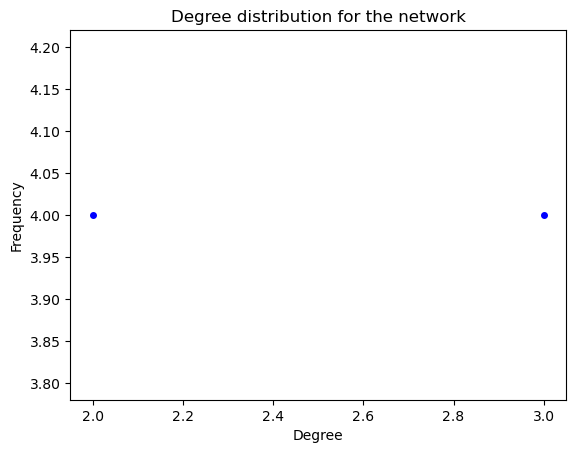

In [129]:
import collections

degree_seq = [d[1] for d in sorted_degree]
degreeCount = collections.Counter(degree_seq)
degreeCount = pd.DataFrame.from_dict( degreeCount, orient='index').reset_index()
fig = plt.figure()
ax = plt.gca()
ax.plot(degreeCount['index'], degreeCount[0], 'o', c='blue', markersize= 4)
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.title('Degree distribution for the network')

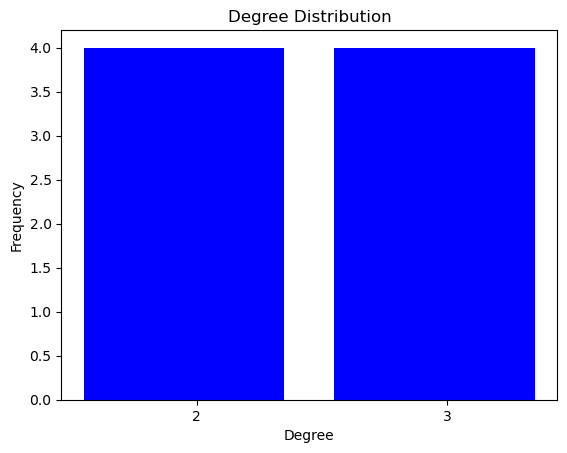

In [130]:
#As barplot:
plot_degree_distribution(G)

#### Katz Centrality:

In [131]:
from operator import itemgetter
degrees = dict(G.degree(G.nodes()))

katz = nx.katz_centrality(G)
nx.set_node_attributes(G, katz, 'katz')
sorted_katz = sorted(katz.items(), key=itemgetter(1), reverse=True)

# And the top 5 most popular quakers are.. 
for number, katzc in sorted_katz[:5]:
    print(number, 'has katz-centrality: %.3f' %katzc)

6 has katz-centrality: 0.372
7 has katz-centrality: 0.372
5 has katz-centrality: 0.372
1 has katz-centrality: 0.365
8 has katz-centrality: 0.338


Note: this is an undirected graph. If you were to have a **directed** one, use separate metrics for **indegree** and **outdegree**.

#### Betweenness Centrality:

In [132]:
from operator import itemgetter
# Compute betweenness centrality
betweenness = nx.betweenness_centrality(G)
# Assign the computed centrality values as a node-attribute in your network
nx.set_node_attributes(G, betweenness, 'betweenness')
sorted_betweenness = sorted(betweenness.items(), key=itemgetter(1), reverse=True)

for number, bw in sorted_betweenness[:5]:
    print(number, 'has betweeness: %.3f' %bw)

4 has betweeness: 0.571
5 has betweeness: 0.571
1 has betweeness: 0.476
6 has betweeness: 0.119
7 has betweeness: 0.119


#### Plot betweenness:

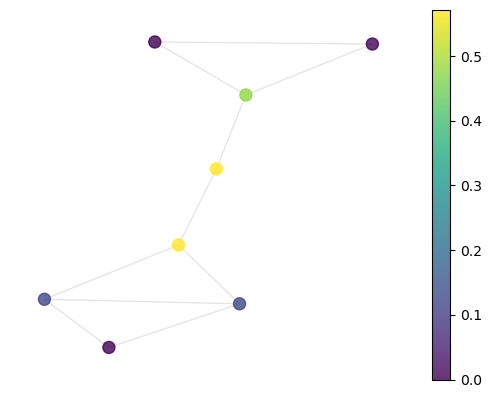

In [133]:
# similar pattern
list_nodes =list(G.nodes())
list_nodes.reverse()   # for showing the nodes with high betweeness centrality 
pos = nx.spring_layout(G)
ec = nx.draw_networkx_edges(G, pos, alpha=0.1)
nc = nx.draw_networkx_nodes(G, pos, nodelist=list_nodes, node_color=[G.nodes[n]["betweenness"] for n in list_nodes], 
                            alpha=0.8, node_shape = '.')
plt.colorbar(nc)
plt.axis('off')
plt.show()

#### Page Rank:

In [134]:
%%skip
pagerank = nx.pagerank(G)
#Returns a dict.

UsageError: Cell magic `%%skip` not found.


#### Eigenvector coentrality (eigen vector):

In [135]:
%%skip
eigenvector_centrality = pd.Series(dict(nx.algorithms.eigenvector_centrality(G)))
eigenvector_centrality[node_name]

UsageError: Cell magic `%%skip` not found.


### Community detection:

Two Algorithms:

* Girvan Newman
* Louvain

#### Girvan Newman

The idea is that nodes that separate communities have high in between centrality. <br>

In [136]:
from networkx.algorithms.community.centrality import girvan_newman
import itertools

comp = girvan_newman(G)
it = 0
for communities in itertools.islice(comp, 4):
    it +=1
    print('Iteration', it)
    print(tuple(sorted(c) for c in communities)) 

Iteration 1
([1, 2, 3, 4], [5, 6, 7, 8])
Iteration 2
([1, 2, 3], [4], [5, 6, 7, 8])
Iteration 3
([1, 2, 3], [4], [5], [6, 7, 8])
Iteration 4
([1], [2, 3], [4], [5], [6, 7, 8])


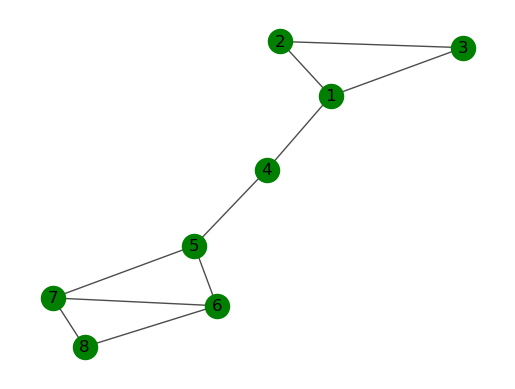

In [137]:
visualize_graph(G,alpha=0.7)

#### The louvain method:

The other way around. First every node is considered a community and then the communities are fused step by step. <br>
For each community it is tested whether the merging with the neighbouring community improves the clustering or not.

In [138]:
%% skip
from community import community_louvain

partition = community_louvain.best_partition(G)
# add it as an attribute to the nodes
for n in G.nodes:
    G.nodes[n]["louvain"] = partition[n]

UsageError: Cell magic `%%` not found.


##### Plot:

In [139]:
%%skip
# plot it out
pos = nx.spring_layout(G,k=0.2)
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=[G.nodes[n]["louvain"] for n in G.nodes], 
                            node_size=100, cmap=plt.cm.jet)
plt.axis('off')
plt.show()

UsageError: Cell magic `%%skip` not found.


##### Look at clusters:

In [140]:
%% skip
cluster_6 = partition[6]
# Take all the nodes that belong to James' cluster
members_c = [q for q in G.nodes if partition[q] == cluster_6]
# get info about these quakers
%% skip
for quaker in members_c:
    print(quaker, 'who is', quakerG.nodes[quaker]['Role'], 'and died in ',quakerG.nodes[quaker]['Deathdate'])

UsageError: Cell magic `%%` not found.


### Homophily (likelihood of similar nodes being connected):

#### assortativity coefficient:

The assortiativity coefficient is a measure of the degree to what nodes with similar attributs connect. <br>
You will get a value between -1 and 1. <br>
1 means perfect assortativity : All nodes with the same attribute will be connected. <br>
-1 signifies perfect disassortativity : All nodes with the same attribute values will not be connected. <br>
0 means no assortativity : The connectivity is independent of the nodes attribute value.

In [141]:
%%skip
# for categorical attributes
nx.attribute_assortativity_coefficient(quakerG, 'Gender')

UsageError: Cell magic `%%skip` not found.


## Directed Graph:

### define graph:

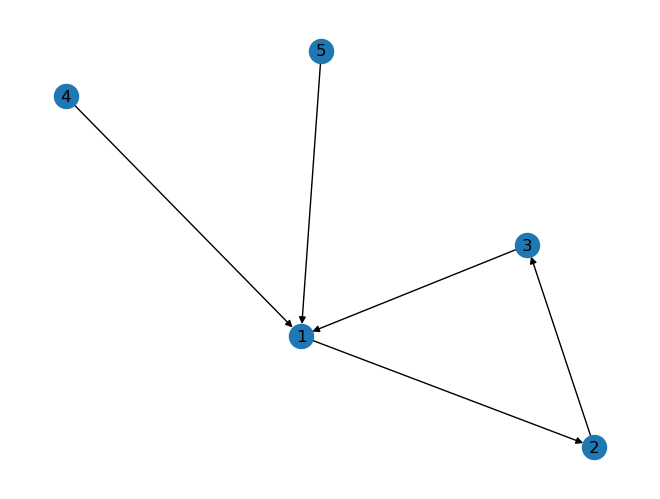

In [142]:
# exampleG =nx.from_pandas_edgelist(df_edges, 'Source', 'Target', edge_attr=None, create_using= nx.DiGraph())

Gd = nx.DiGraph()
# Add edges to the graph
Gd.add_edge(1, 2)
Gd.add_edge(2, 3)
Gd.add_edge(3, 1)
Gd.add_edge(4, 1)
Gd.add_edge(5, 1)
# Visualize the graph
nx.draw(Gd, with_labels=True)
plt.show()

### Indegree or outdegree:

In [143]:
#outdegrees:
#Where does the node 1 point to
node = 1
points_to = list(Gd.successors(node))
#what is the outdegree of node 1
out_degree = len(list(Gd.successors(node)))


#indegrees:
#Which nodes point to the node 1
node = 1
inpointing_nodes = list(Gd.predecessors(node))
#what is the outdegree of node 1
in_degree = len(list(Gd.predecessors(node)))

In [144]:
indegree = []
outdegree = []
for node in Gd.nodes:
    outdegree.append(len(list(Gd.successors(node))))
    indegree.append(len(list(Gd.predecessors(node))))
indegree = np.array(indegree)
outdegree = np.array(outdegree)

In [145]:
nodes = Gd.nodes()

in_degree = dict(Gd.in_degree())
out_degree = dict(Gd.out_degree())

degseq_in=[in_degree.get(k,0) for k in nodes]
degseq_out=[out_degree.get(k,0) for k in nodes]

#get frequency:
dmax = max(degseq_in)+1
freq= [ 0 for d in range(dmax) ]
for d in degseq_in: #same for degseq_out    
    freq[d] += 1


In directed graphs the indegree average is always equal to the outdegree average.

#### Histograms of degree distributions:

In [146]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

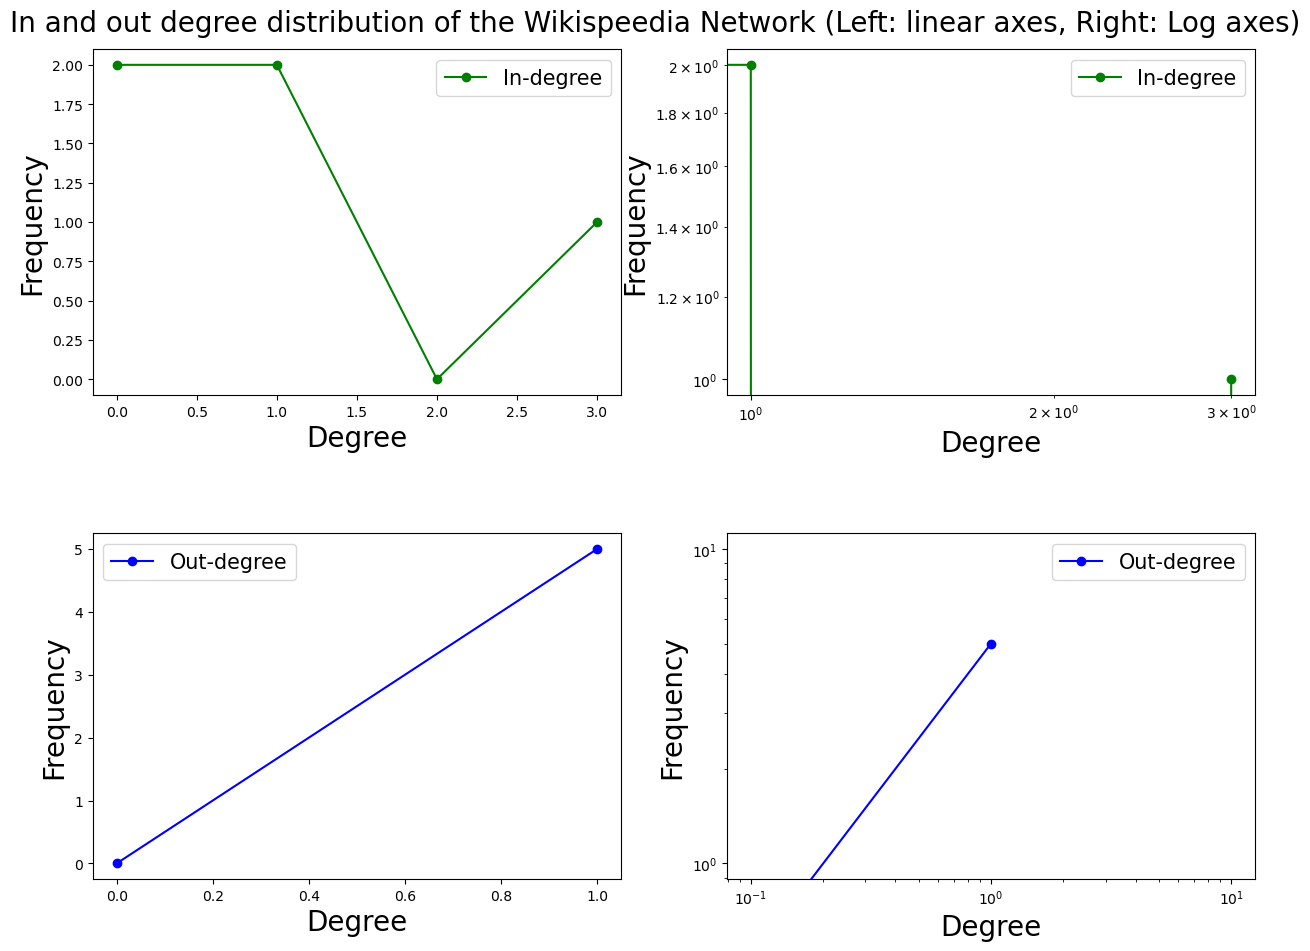

In [147]:

in_degree_freq = degree_histogram_directed(Gd, in_degree=True)
out_degree_freq = degree_histogram_directed(Gd, out_degree=True)
degrees = range(len(in_degree_freq))
fig, axes = plt.subplots(2, 2, figsize = (15,10),gridspec_kw={'hspace': 0.4, 'wspace': 0.2})
fig.suptitle("In and out degree distribution of the Wikispeedia Network (Left: linear axes, Right: Log axes)", fontsize=20)
axes[0][0].plot(range(len(in_degree_freq)), in_degree_freq, 'go-', label='In-degree')
axes[0][1].loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='In-degree') 
axes[1][0].plot(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='Out-degree')
axes[1][1].loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='Out-degree')
for x in range(0,axes.shape[0]):
    for y in range(0,axes.shape[1]):
        axes[x,y].set_xlabel('Degree', fontsize = 20)
        axes[x,y].set_ylabel('Frequency', fontsize = 20)
        axes[x,y].legend(fontsize=15)
fig.subplots_adjust(top=0.94)
plt.show()

### Connectivity:

#### weakly connected (in undirected graph, would be connected):

In [148]:
print("Weakly connected: ", nx.is_weakly_connected(Gd))
print(f"There are {len(list(nx.weakly_connected_components(Gd)))} weakly connected components")

Weakly connected:  True
There are 1 weakly connected components


In [149]:
largest_cc = max(nx.weakly_connected_components(Gd), key=len)
H = Gd.subgraph(list(largest_cc))
print(len(H.nodes()), len(H.edges()), len(H.edges())/len(H.nodes()))
print('{:} % of the nodes are in the biggest compartment'.format(len(H.nodes())/len(G.nodes())*100))
print('{:} % of the edges are in the biggest compartment'.format(len(H.edges())/len(G.edges())*100))

5 5 1.0
62.5 % of the nodes are in the biggest compartment
50.0 % of the edges are in the biggest compartment


#### Strongly connected:

In [150]:
print("Strongly connected: ", nx.is_strongly_connected(Gd))
print(f"There are {len(list(nx.strongly_connected_components(Gd)))} strongly connected components")

Strongly connected:  False
There are 3 strongly connected components


In [151]:
largest_cc = max(nx.strongly_connected_components(Gd), key=len)
H = Gd.subgraph(list(largest_cc))
print(len(H.nodes()), len(H.edges()), len(H.edges())/len(H.nodes()))
print('{:} % of the nodes are in the biggest compartment'.format(len(H.nodes())/len(G.nodes())*100))
print('{:} % of the edges are in the biggest compartment'.format(len(H.edges())/len(G.edges())*100))



3 3 1.0
37.5 % of the nodes are in the biggest compartment
30.0 % of the edges are in the biggest compartment
